# ECE9039 MACHINE LEARNING 

Temp:
- Features Extraction
- Autoencoders
- MLP
- CNN
- GANs
- Transfer Learning with Pre-trained Models
- Ensemble Learning

1. Accuracy
The most straightforward metric, it measures the proportion of correctly classified instances out of the total instances.

2. Precision
Precision is the ratio of correctly predicted positive observations to the total predicted positives. It is a measure of a classifier's exactness. High precision relates to a low false positive rate.

3. Recall (Sensitivity or True Positive Rate)
Recall is the ratio of correctly predicted positive observations to all observations in the actual class. It is a measure of a classifier's completeness.

4. F1 Score
The F1 Score is the harmonic mean of Precision and Recall. An F1 Score might be a better measure to use if you need to seek a balance between Precision and Recall and there is an uneven class distribution (large number of actual negatives).

5. Confusion Matrix
A confusion matrix is a table used to describe the performance of a classification model on a set of test data for which the true values are known. It allows you to visualize the performance of 

10. Top-k Accuracy
In cases where the model can predict multiple classes, the top-k accuracy might be used. It measures whether the correct label is within the top-k predicted labels

12. Cross-Entropy Loss
Also known as log loss, it measures the performance of a classification model whose output is a probability value between 0 and 1. Cross-entropy loss increases as the predicted probability diverges from the actual label.

13. Balanced Accuracy
This metric is used for imbalanced datasets and is calculated as the average of recall obtained on each class. It compensates for the fact that traditional accuracy can be skewed when class distributions are imbalanced..an algorithm..teness.

In [1]:
import tensorflow as tf
import cv2
import numpy as np
import os
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Activation
from tensorflow.keras.optimizers import Adam
from collections import Counter

In [2]:
def load_images_and_labels_limited(dataset_path, max_images_per_label, target_size=(224, 224)):
    images = []
    labels = []
    
    # Loop through each subfolder in the dataset directory
    for root, dirs, files in os.walk(dataset_path):
        if root == dataset_path:
            continue
        label = os.path.basename(root)
        count = 0
        for file in sorted(files):
            if file.lower().endswith(".jpg") and count < max_images_per_label:
                # Construct the full path to the image file
                file_path = os.path.join(root, file)
                image = Image.open(file_path).convert('RGB').resize(target_size)
                images.append(np.array(image))
                labels.append(label)
                count += 1
                
    return np.array(images), np.array(labels)

In [3]:
dataset_path = 'RealWaste/'
images, labels = load_images_and_labels_limited(dataset_path, float("inf"))

print("Images shape:", images.shape)
print("Labels count:", len(np.unique(labels)))

Images shape: (4752, 224, 224, 3)
Labels count: 9


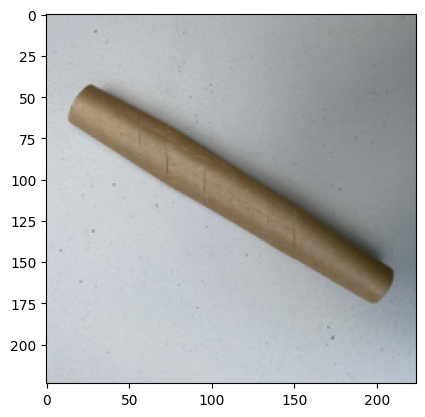

In [4]:
plt.imshow(images[0])

In [5]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42, stratify=labels)

print("Training set size:", len(X_train))
print("Testing set size:", len(X_test))

Training set size: 3801
Testing set size: 951


In [6]:
label_counts = Counter(y_train)
for label, count in label_counts.items():
    print(f"Label: {label}, Count: {count}")

Label: Metal, Count: 632
Label: Paper, Count: 400
Label: Vegetation, Count: 349
Label: Plastic, Count: 736
Label: Miscellaneous Trash, Count: 396
Label: Textile Trash, Count: 254
Label: Food Organics, Count: 329
Label: Glass, Count: 336
Label: Cardboard, Count: 369


In [11]:
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

In [18]:
model = Sequential([
    Conv2D(256, (3, 3), activation='relu', input_shape=(224,224,3)),
    MaxPooling2D(2, 2),
    Dropout(0.3),
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Dropout(0.3),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Dropout(0.3),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(9, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [19]:
history = model.fit(X_train, y_train, epochs=100,validation_data=(X_test, y_test), batch_size=32)
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {loss}, Test accuracy: {accuracy}')

Epoch 1/100
119/119 [==============================] - 23s 163ms/step - loss: 42.0666 - accuracy: 0.1586 - val_loss: 2.1741 - val_accuracy: 0.1661
Epoch 2/100
119/119 [==============================] - 16s 136ms/step - loss: 2.1633 - accuracy: 0.1813 - val_loss: 2.1523 - val_accuracy: 0.1956
Epoch 3/100
119/119 [==============================] - 17s 139ms/step - loss: 2.1445 - accuracy: 0.2013 - val_loss: 2.1426 - val_accuracy: 0.1945
Epoch 4/100
119/119 [==============================] - 16s 137ms/step - loss: 2.1361 - accuracy: 0.2023 - val_loss: 2.1567 - val_accuracy: 0.2029
Epoch 5/100
119/119 [==============================] - 16s 136ms/step - loss: 2.1230 - accuracy: 0.2147 - val_loss: 2.1407 - val_accuracy: 0.1987
Epoch 6/100
119/119 [==============================] - 16s 136ms/step - loss: 2.1212 - accuracy: 0.2065 - val_loss: 2.1455 - val_accuracy: 0.1956
Epoch 7/100
119/119 [==============================] - 16s 136ms/step - loss: 2.1351 - accuracy: 0.2131 - val_loss: 2.1417 

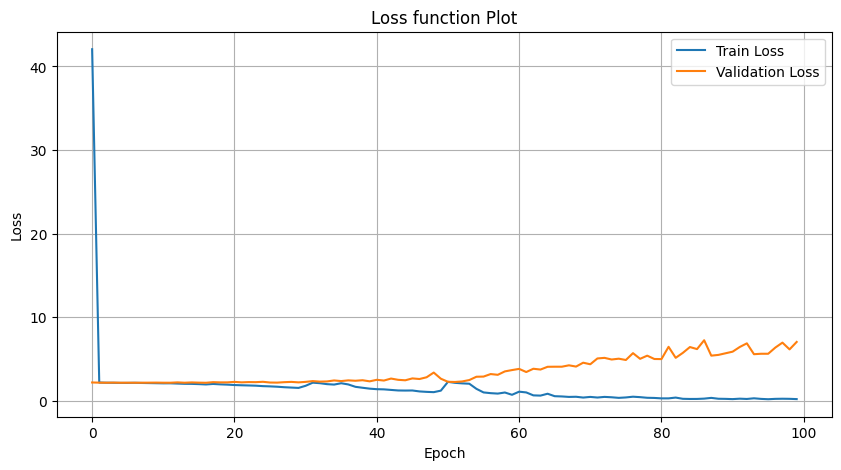

In [20]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss function Plot')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()